In [1]:
import pandas as pd 
from datetime import datetime
import numpy as np 
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [2]:
alc = pd.read_csv('alc.csv')
alc = alc.dropna().reset_index()
alc

,index,DD (grados),HR (% H.R.),Hour,Month,NO (µg/m³N),NO2 (µg/m³N),NOX (µg/m³N),O3 (µg/m³N),PM10 (µg/m³N),...,NO_lag1,NO2_lag1,NOX_lag1,PM10_lag1,O3_lag1,NO_lag2,NO2_lag2,NOX_lag2,PM10_lag2,O3_lag2
0,0,265.0,39.0,12,2.582276e-02,4.0,10.0,15.0,71.0,5.0,...,5.0,11.0,18.0,7.0,69.0,5.0,20.0,27.0,11.0,46.0
1,1,248.0,36.8,13,2.797466e-02,3.0,10.0,14.0,77.0,7.0,...,4.0,10.0,15.0,5.0,71.0,5.0,11.0,18.0,7.0,69.0
2,2,128.0,39.4,14,3.012655e-02,4.0,11.0,17.0,77.0,8.0,...,3.0,10.0,14.0,7.0,77.0,4.0,10.0,15.0,5.0,71.0
3,3,185.0,33.6,15,3.227844e-02,4.0,8.0,14.0,82.0,4.0,...,4.0,11.0,17.0,8.0,77.0,3.0,10.0,14.0,7.0,77.0
4,4,232.0,33.6,16,3.443033e-02,2.0,9.0,12.0,87.0,9.0,...,4.0,8.0,14.0,4.0,82.0,4.0,11.0,17.0,8.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17503,17503,335.0,76.0,19,8.607594e-03,15.0,49.0,72.0,4.0,40.0,...,3.0,31.0,36.0,32.0,31.0,3.0,18.0,22.0,26.0,49.0
17504,17504,282.0,81.0,20,6.455696e-03,39.0,56.0,115.0,3.0,50.0,...,15.0,49.0,72.0,40.0,4.0,3.0,31.0,36.0,32.0,31.0
17505,17505,320.0,85.0,21,4.303797e-03,84.0,63.0,191.0,2.0,43.0,...,39.0,56.0,115.0,50.0,3.0,15.0,49.0,72.0,40.0,4.0
17506,17506,148.0,87.0,22,2.151899e-03,80.0,57.0,180.0,2.0,41.0,...,84.0,63.0,191.0,43.0,2.0,39.0,56.0,115.0,50.0,3.0


In [28]:
x = alc[['NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour']]
y1 = alc[['NOX (µg/m³N)']]
y2 = alc[['NO (µg/m³N)']]
y3 = alc[['NO2 (µg/m³N)']]
y4 = alc[['SO2 (µg/m³N)']]
y5 = alc[['O3 (µg/m³N)']]
y6 = alc[['PM10 (µg/m³N)']]

In [30]:
y_train = y1[5000:]
y_test = y1[:5000]

In [31]:
rmse_val = [] #to store rmse values for different k
for K in range(50):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
   # print('RMSE value for k= ' , K , 'is:', error)

17.749332719851754
17.749332719851754


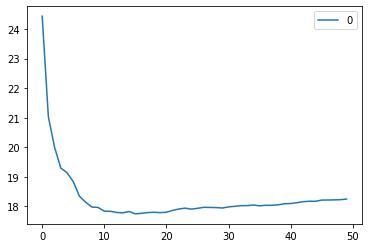

In [33]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()
print(min(rmse_val))
print(rmse_val[15])

In [3]:
alc = pd.read_csv('alc.csv')
list_x = [['NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','Month','Hour']]
list_y = ['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','PM10 (µg/m³N)']
model = neighbors.KNeighborsRegressor(n_neighbors = 16)
for i in np.arange(0,6):
    x = alc[list_x[i]]
    y = alc[[list_y[i]]]
    x_train = x[5000:]
    y_train = y[5000:]
    x_test = x[:5000]
    y_test = y[:5000]
    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    score = model.score(x,y)
    rmse = np.sqrt(mean_squared_error(y_test,pred))
    print(list_y[i],'\n Accuracy:',score,'\n','RMSE: ',rmse)

NOX (µg/m³N) 
 Accuracy: 0.9886328072653626 
 RMSE:  8.760029223695547
NO (µg/m³N) 
 Accuracy: 0.9941955403251245 
 RMSE:  2.8731877766689737
NO2 (µg/m³N) 
 Accuracy: 0.9618374379290734 
 RMSE:  6.361887770151246
SO2 (µg/m³N) 
 Accuracy: 0.6131415245520059 
 RMSE:  1.6264415144726232
O3 (µg/m³N) 
 Accuracy: 0.9032759199742323 
 RMSE:  20.15725199524975
PM10 (µg/m³N) 
 Accuracy: 0.6572718335580301 
 RMSE:  16.23466464082335


# Time series

In [8]:
alc = pd.read_csv('alc.csv')
#list_x = [['NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','Month','Hour']]
#list_y = ['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','PM10 (µg/m³N)']
model = neighbors.KNeighborsRegressor(n_neighbors = 19)
list_x = ['DD (grados)', 'HR (% H.R.)', 'Hour', 'Month', 'RS (W/m³)', 'TMP (ºC)', 'VV (m/s)', 'NO_roll_mean', 'NO2_roll_mean', 'NOX_roll_mean', 'PM10_roll_mean', 'O3_roll_mean', 'NO_lag1', 'NO2_lag1', 'NOX_lag1', 'PM10_lag1', 'O3_lag1', 'NO_lag2', 'NO2_lag2', 'NOX_lag2', 'PM10_lag2', 'O3_lag2']
list_y = ['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','PM10 (µg/m³N)']
for i in np.arange(0,6):
    x = alc[list_x]
    y = alc[[list_y[i]]]
    x_train = x[5000:]
    y_train = y[5000:]
    x_test = x[:5000]
    y_test = y[:5000]
    model.fit(x_train,y_train)  
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    score = model.score(x_test,y_test)
    print(list_y[i],'\n R-squared:',score,'\n','RMSE: ',rmse)

NOX (µg/m³N) 
 R-squared: 0.7608912624667972 
 RMSE:  17.995991690980194
NO (µg/m³N) 
 R-squared: 0.7220250548071316 
 RMSE:  8.230569605637328
NO2 (µg/m³N) 
 R-squared: 0.7309714305873642 
 RMSE:  8.770774489249751
SO2 (µg/m³N) 
 R-squared: 0.24264653842991668 
 RMSE:  1.189138126865228
O3 (µg/m³N) 
 R-squared: 0.8759973914613983 
 RMSE:  11.79849511226442
PM10 (µg/m³N) 
 R-squared: 0.4653277659870584 
 RMSE:  9.409360229178054
